In [10]:
import os

import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import pandas as pd


def read_log(fname):
    return pd.read_csv(os.path.expanduser(f'../data/{fname}'))


def savefig(figname):
    plt.savefig(f'../md/images/{figname}')

## Verlet Coefficient

In [16]:
df = read_log('terma2.log')

FileNotFoundError: [Errno 2] File b'../data/terma2.log' does not exist: b'../data/terma2.log'

In [17]:
plt.plot(df.time, df.verlet)
plt.xlabel('Tiempo (unidades reducidas)')
plt.ylabel('Verlet Coefficient')
plt.xlim(0, 10.0)
plt.grid()
# savefig('verlet_vs_t.png')
plt.show()

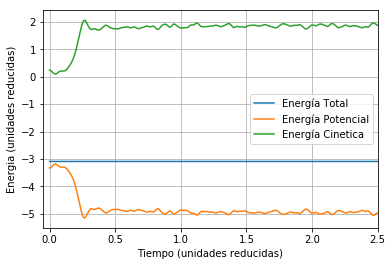

In [59]:
plt.plot(df.time, df.E, label='Energía Total')
plt.plot(df.time, df.V, label='Energía Potencial')
plt.plot(df.time, df.K, label='Energía Cinetica')
plt.xlabel('Tiempo (unidades reducidas)')
plt.ylabel('Energia (unidades reducidas)')
plt.legend()
plt.grid()
plt.xlim(-0.05, 2.5)
# savefig('e_vs_t.png')
plt.show()

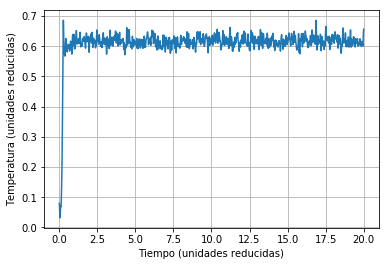

In [56]:
plt.plot(df.time, df['T'])
plt.xlabel('Tiempo (unidades reducidas)')
plt.ylabel('Temperatura (unidades reducidas)')
plt.grid()
# savefig('T_vs_t.png')
plt.show()

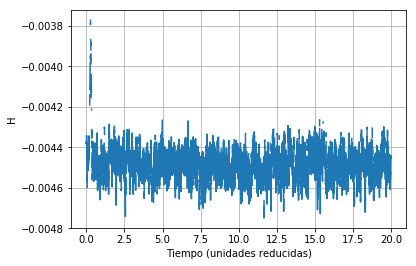

In [57]:
plt.plot(df.time, df.H)
plt.xlabel('Tiempo (unidades reducidas)')
plt.ylabel('H')
plt.grid()
# savefig('H_vs_t.png')
plt.show()

## Cv

In [18]:
_temperatures = np.arange(0, 2, 0.1)

es = []
std_e = []
ts = []
std_t = []
for temperature in _temperatures:
    df = read_log(f'temp_{temperature:.2f}.log')
    es.append(df.E.mean())
    std_e.append(df.E.std())
    ts.append(df["T"].mean())
    std_t.append(df['T'].std())
    
es = np.array(es)
std_e = np.array(std_e)
ts = np.array(ts)
std_t = np.array(std_t)

FileNotFoundError: [Errno 2] File b'../data/temp_0.00.log' does not exist: b'../data/temp_0.00.log'

In [17]:
std_t

array([0.        , 0.01550449, 0.01515053, 0.01446885, 0.01388206,
       0.0152243 , 0.014492  , 0.0185505 , 0.01461088, 0.01428176,
       0.01545882, 0.01785777, 0.01872661, 0.01686711, 0.01572602,
       0.01749472, 0.01908585, 0.01981479, 0.0178788 , 0.02108429])

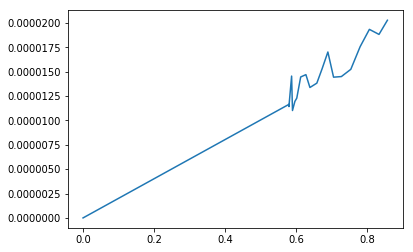

In [19]:
plt.plot(ts, std_e)

## Rescaling

In [26]:
df = read_log('temp.csv')

In [27]:
df.head()

,real_t,real_t_std,real_rho,real_rho_std,e,e_std
0,0.408239,0.015381,0.578704,1.115816e-16,-2.308678,0.000008
1,0.509693,0.019811,0.578704,1.115816e-16,-1.920470,0.000012
2,0.601117,0.018916,0.578704,1.115816e-16,-1.527884,0.000014
3,0.686319,0.024521,0.578704,1.115816e-16,-1.187498,0.000016
4,0.837233,0.027762,0.578704,1.115816e-16,-0.623283,0.000023


In [33]:
low_density = df.query('real_rho == {}'.format(df.real_rho.unique()[0]))

In [34]:
low_density

,real_t,real_t_std,real_rho,real_rho_std,e,e_std
0,0.408239,0.015381,0.578704,1.115816e-16,-2.308678,0.000008
1,0.509693,0.019811,0.578704,1.115816e-16,-1.920470,0.000012
2,0.601117,0.018916,0.578704,1.115816e-16,-1.527884,0.000014
3,0.686319,0.024521,0.578704,1.115816e-16,-1.187498,0.000016
4,0.837233,0.027762,0.578704,1.115816e-16,-0.623283,0.000023
5,0.894490,0.029123,0.578704,1.115816e-16,-0.372417,0.000018
6,1.021884,0.035734,0.578704,1.115816e-16,0.096599,0.000035
7,1.123582,0.035810,0.578704,1.115816e-16,0.474616,0.000030
8,1.238347,0.044127,0.578704,1.115816e-16,0.894545,0.000034
9,1.306559,0.043630,0.578704,1.115816e-16,1.153965,0.000043
